**KNN分类器**      
KNN(k-nearest neighbors)是用k个最近邻的训练数据集来寻找未知对象分类的一种算法。    
如果希望找到未知数据点属于哪个类，可以找到KNN并做一个多数表决

Number of labels: 3


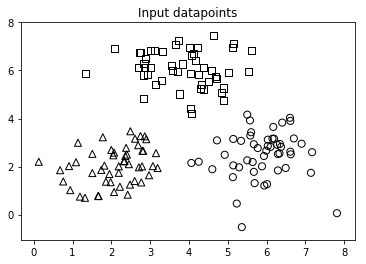

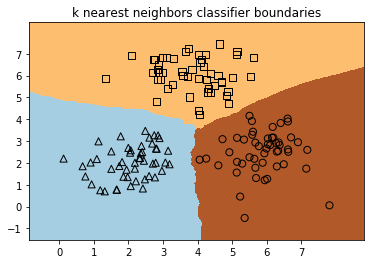

Predicted output: 2


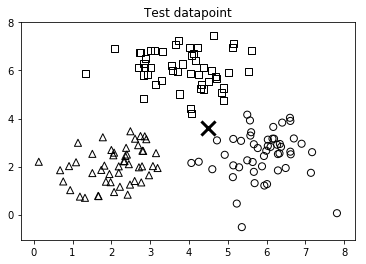

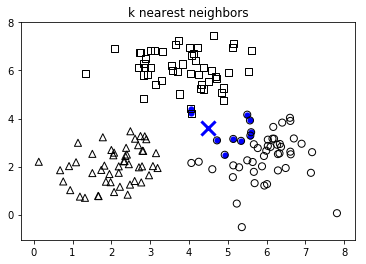

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

def txt_read(filename,delim):
    x_data = []
    y_data = []
    with open(filename,'r') as f:
        for line in f:
            data = [float(x) for x in line.split(delim)]
            x_data.append(data[:-1])
            y_data.append(data[-1])

    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data,y_data 

def plot_classifier(classifier,x,y,title):
    # 定义图形的取值范围
    x_min,x_max = min(x[:,0])-1.0,max(x[:,0])+1.0
    y_min,y_max = min(x[:,1])-1.0,max(x[:,1])+1.0
    # 预测值表示我们在图形中想要使用的数值范围，我们增加了一些余量，例如上述代码中的1.0
    
    # 为了画出边界，还需要利用一组网格数据求出方程的值，然后把边界画出来
    step_size = 0.01 # 网格步长 
    x_values,y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size)) # 定义网格
    
    # 计算出分类器对所有数据点的分类结果
    mesh_output = classifier.predict(np.c_[x_values.ravel(),y_values.ravel()]) # 分类器输出结果
    mesh_output = mesh_output.reshape(x_values.shape) # 数组维度变形
    ## np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
    ## np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。
    ## ravel()将多维数组降为一维列向量
    
    # 用彩色区域画出各个类型的边界
    plt.figure()
    plt.pcolormesh(x_values,y_values,mesh_output,cmap=plt.cm.Paired) # 选择配色方案
    
    # 接下来再把训练数据点画在图上
#     plt.scatter(x[:,0],x[:,1],c=y,s=80,edgecolors='blue',linewidth=1,cmap=plt.cm.Paired)
    # c=y表示颜色使用顺序（y对应的是label），用目标标记映射cmap的颜色表
    markers = '^sov<>hp'
    mapper = np.array([markers[i] for i in y])
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
                s=50, edgecolors='black', facecolors='none')
    plt.xlim(x_values.min(),x_values.max())
    plt.ylim(y_values.min(),y_values.max())
    
    plt.xticks(np.arange(int(x_min),int(x_max),1.0))
    plt.yticks(np.arange(int(y_min),int(y_max),1.0))

    plt.title(title)
    plt.show()

# 加载数据
input_file = 'data_nn_classifier.txt'
X,y = txt_read(input_file,',')
y = y.astype(np.int)
print('Number of labels:',len(set(y)))

# 可视化输入数据点
plt.figure()
plt.title('Input datapoints')
markers = '^sov<>hp'
mapper = np.array([markers[i] for i in y])
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')
    
# 构建分类器
num_neighbors = 10
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, y)
# 在图中画出训练数据点
plot_classifier(classifier,X,y,'k nearest neighbors classifier boundaries')

# 测试数据点
test_datapoint = np.array([[4.5, 3.6]])
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0,0], test_datapoint[0,1], marker='x', 
        linewidth=3, s=200, facecolors='black')

# 提取KNN分类结果
dist, indices = classifier.kneighbors(test_datapoint)
# 画出KNN分类结果
plt.figure()
plt.title('k nearest neighbors')

for i in indices[0]:
    plt.scatter(X[i, 0], X[i, 1], marker='o', 
            linewidth=3, s=10, facecolors='b')

plt.scatter(test_datapoint[0,0], test_datapoint[0,1], marker='x', 
        linewidth=3, s=200, facecolors='b')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict(test_datapoint)[0])

plt.show()

**KNN回归器**    
回归器的目标是预测连续值的输出。以下例子中并没有固定数量的输出类别，仅有一组实际输出值，
我们希望回归器可以预测未知数据点的输出值。    
这个例子中用到一个sinc函数，定义如下：
$sinc(x) = \frac{sin(x)}{x}$    

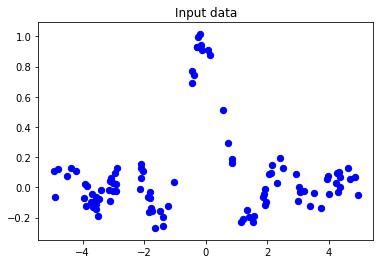

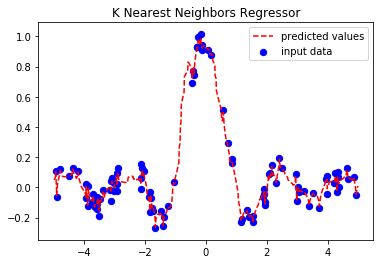

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# 生成一些服从正态分布的样本数据
amplitude = 10
num_points = 100
X = amplitude * np.random.rand(num_points, 1) - 0.5 * amplitude

# 计算目标并添加噪声
y = np.sinc(X).ravel() 
y += 0.2 * (0.5 - np.random.rand(y.size))

# 数据可视化
plt.figure()
plt.scatter(X, y, s=40, c='b', facecolors='none')
plt.title('Input data')

# 用输入数据10倍的密度创建一维网格
x_values = np.linspace(-0.5*amplitude, 0.5*amplitude, 10*num_points)[:, np.newaxis]
n_neighbors = 8
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_values = knn_regressor.fit(X, y).predict(x_values)

plt.figure()
plt.scatter(X, y, s=40, c='b', facecolors='none', label='input data')
plt.plot(x_values, y_values, c='r', linestyle='--', label='predicted values')
plt.xlim(X.min() - 1, X.max() + 1)
plt.ylim(y.min() - 0.2, y.max() + 0.2)
plt.axis('tight')
plt.legend()
plt.title('K Nearest Neighbors Regressor')
plt.show()
